In [1]:
%env CUDA_VISIBLE_DEVICES = 0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
from pressure_utility import jnp, get_pressure_spectrum
import matplotlib.pyplot as plt
import jax
import numpy as np

In [32]:
exp = 5
epch = 499
data = jnp.load(f"/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_pretrain/exps/wm_vf/exp_{exp}/samples_{epch}epch.npy")
gt = jnp.load("/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_wall_dwdy_all_out.npy")[36000:]

In [33]:
data = data[:, 2].reshape(10, 780,320, 200)
gt = gt[:, 0].reshape(10, 780,320, 200)

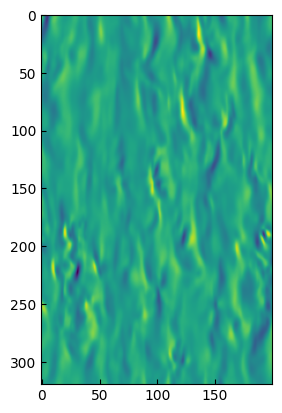

In [47]:
plt.imshow(data[-1,2])

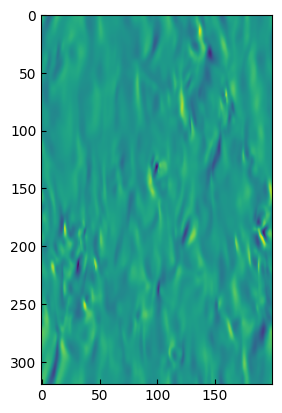

In [46]:
plt.imshow(gt[-1, 1])

In [36]:
Lx = 4* jnp.pi
Ly = 2
Lz = 2* jnp.pi

nu = 2.5e-4

nx = 320
ny = 400
nz = 200

nt = data.shape[1]

size = (nx, ny, nz)
domain = ((0, Lx), (0, Ly),(0, Lz))

In [37]:
dx, dy, dz = Lx/nx, Ly/ny, Lz/nz
dt = 0.05

In [38]:
sub_length=1
sub_sample=jnp.arange(0,data.shape[0],sub_length)

P_x_sum=[None]*len(sub_sample)
P_x_gt_sum=[None]*len(sub_sample)
i=0
for s in sub_sample:
    diff=get_pressure_spectrum(data[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    diff_gt=get_pressure_spectrum(gt[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    f_x, P_x_sum[i] =jax.device_get(diff.get_fft_x())
    f_x_gt, P_x_gt_sum[i] =jax.device_get(diff_gt.get_fft_x())

    i=i+1

P_x=jnp.mean(jnp.array(P_x_sum), axis=0)
P_x_gt=jnp.mean(jnp.array(P_x_gt_sum), axis=0)

In [39]:
u_tau = 0.045

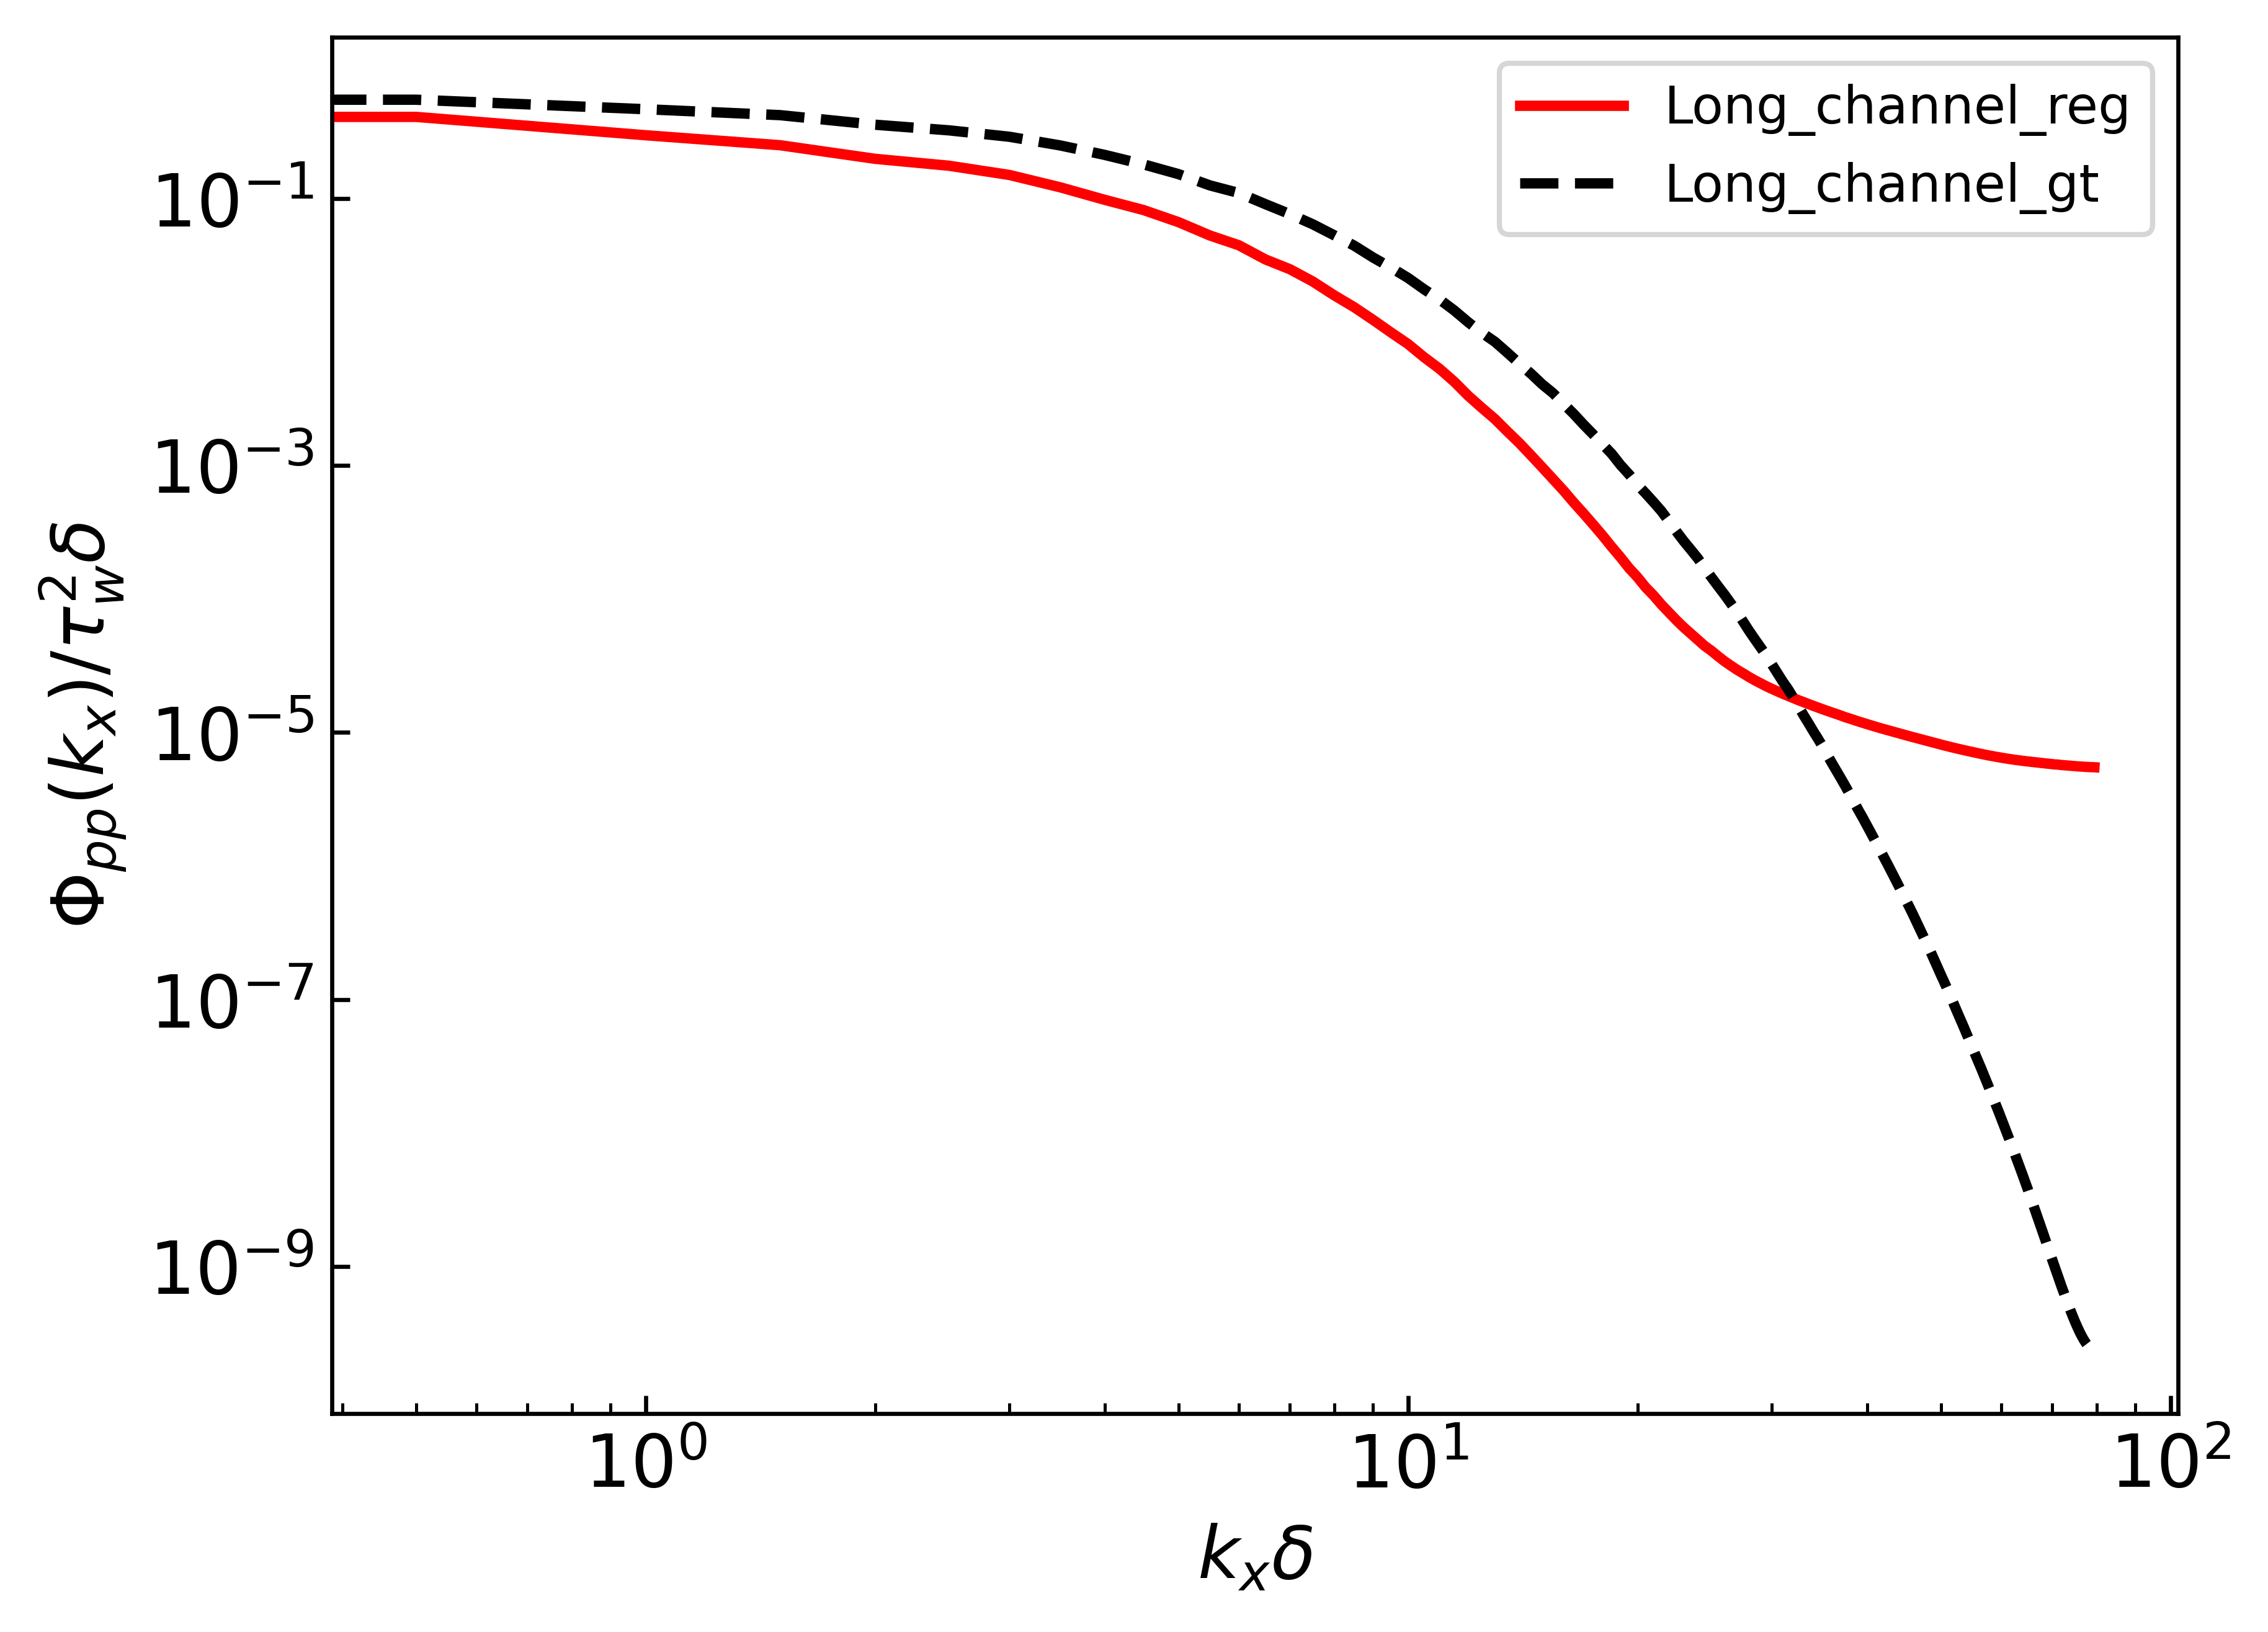

In [40]:
wall_unit = nu / u_tau
tau_w=u_tau**2

f_x_n = 2*jnp.pi*f_x
P_x_n = P_x#/(tau_w**2)

f_x_n_gt = 2*jnp.pi*f_x_gt
P_x_n_gt = P_x_gt#/(tau_w**2)

# load ref
# ref_x = np.loadtxt('/home/xiantao/code/NNwall/Diff-FSI/example/wall_pressure/p_x_180.txt')
# f_x_ref, P_x_ref = ref_x[:,0], ref_x[:,1]

# data_fold = "/home/xiantao/storage/data/APGdata-180/APGchannel-0"

# incompre_x = np.load(data_fold+'/p_x.npy')

# hfont = {'fontname':'Times New Roman'}
# plt.rc('font',family='Times New Roman')
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.figure(dpi=600)
# plt.plot(incompre_x[0],  incompre_x[1],  color='blue',linewidth=2,label='Incompressible')
plt.plot(f_x_n,  P_x_n,color='red',linewidth=2,label='Long_channel_reg')
plt.plot(f_x_n_gt,  P_x_n_gt, '--',color='black',linewidth=2,label='Long_channel_gt')

# plt.scatter(f_x_ref,  P_x_ref,marker='x',color='green',s=30,label='Choi & Moin (1990)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_x \delta$',fontsize = 14)
plt.ylabel(r'$\Phi_{pp}(k_x) /\tau^2_w \delta$',fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlim(3e-1,40)
# plt.ylim(1e-5,1e0)
plt.legend()
plt.show()

In [41]:
P_z_sum=[None]*len(sub_sample)
P_z_sum_gt=[None]*len(sub_sample)

i=0
for s in sub_sample:
    diff=get_pressure_spectrum(data[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    diff_gt=get_pressure_spectrum(gt[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    f_z, P_z_sum[i]=diff.get_fft_z()
    f_z_gt, P_z_sum_gt[i]=diff_gt.get_fft_z()

    i=i+1

P_z=jnp.mean(jnp.array(P_z_sum), axis=0)
P_z_gt=jnp.mean(jnp.array(P_z_sum_gt), axis=0)

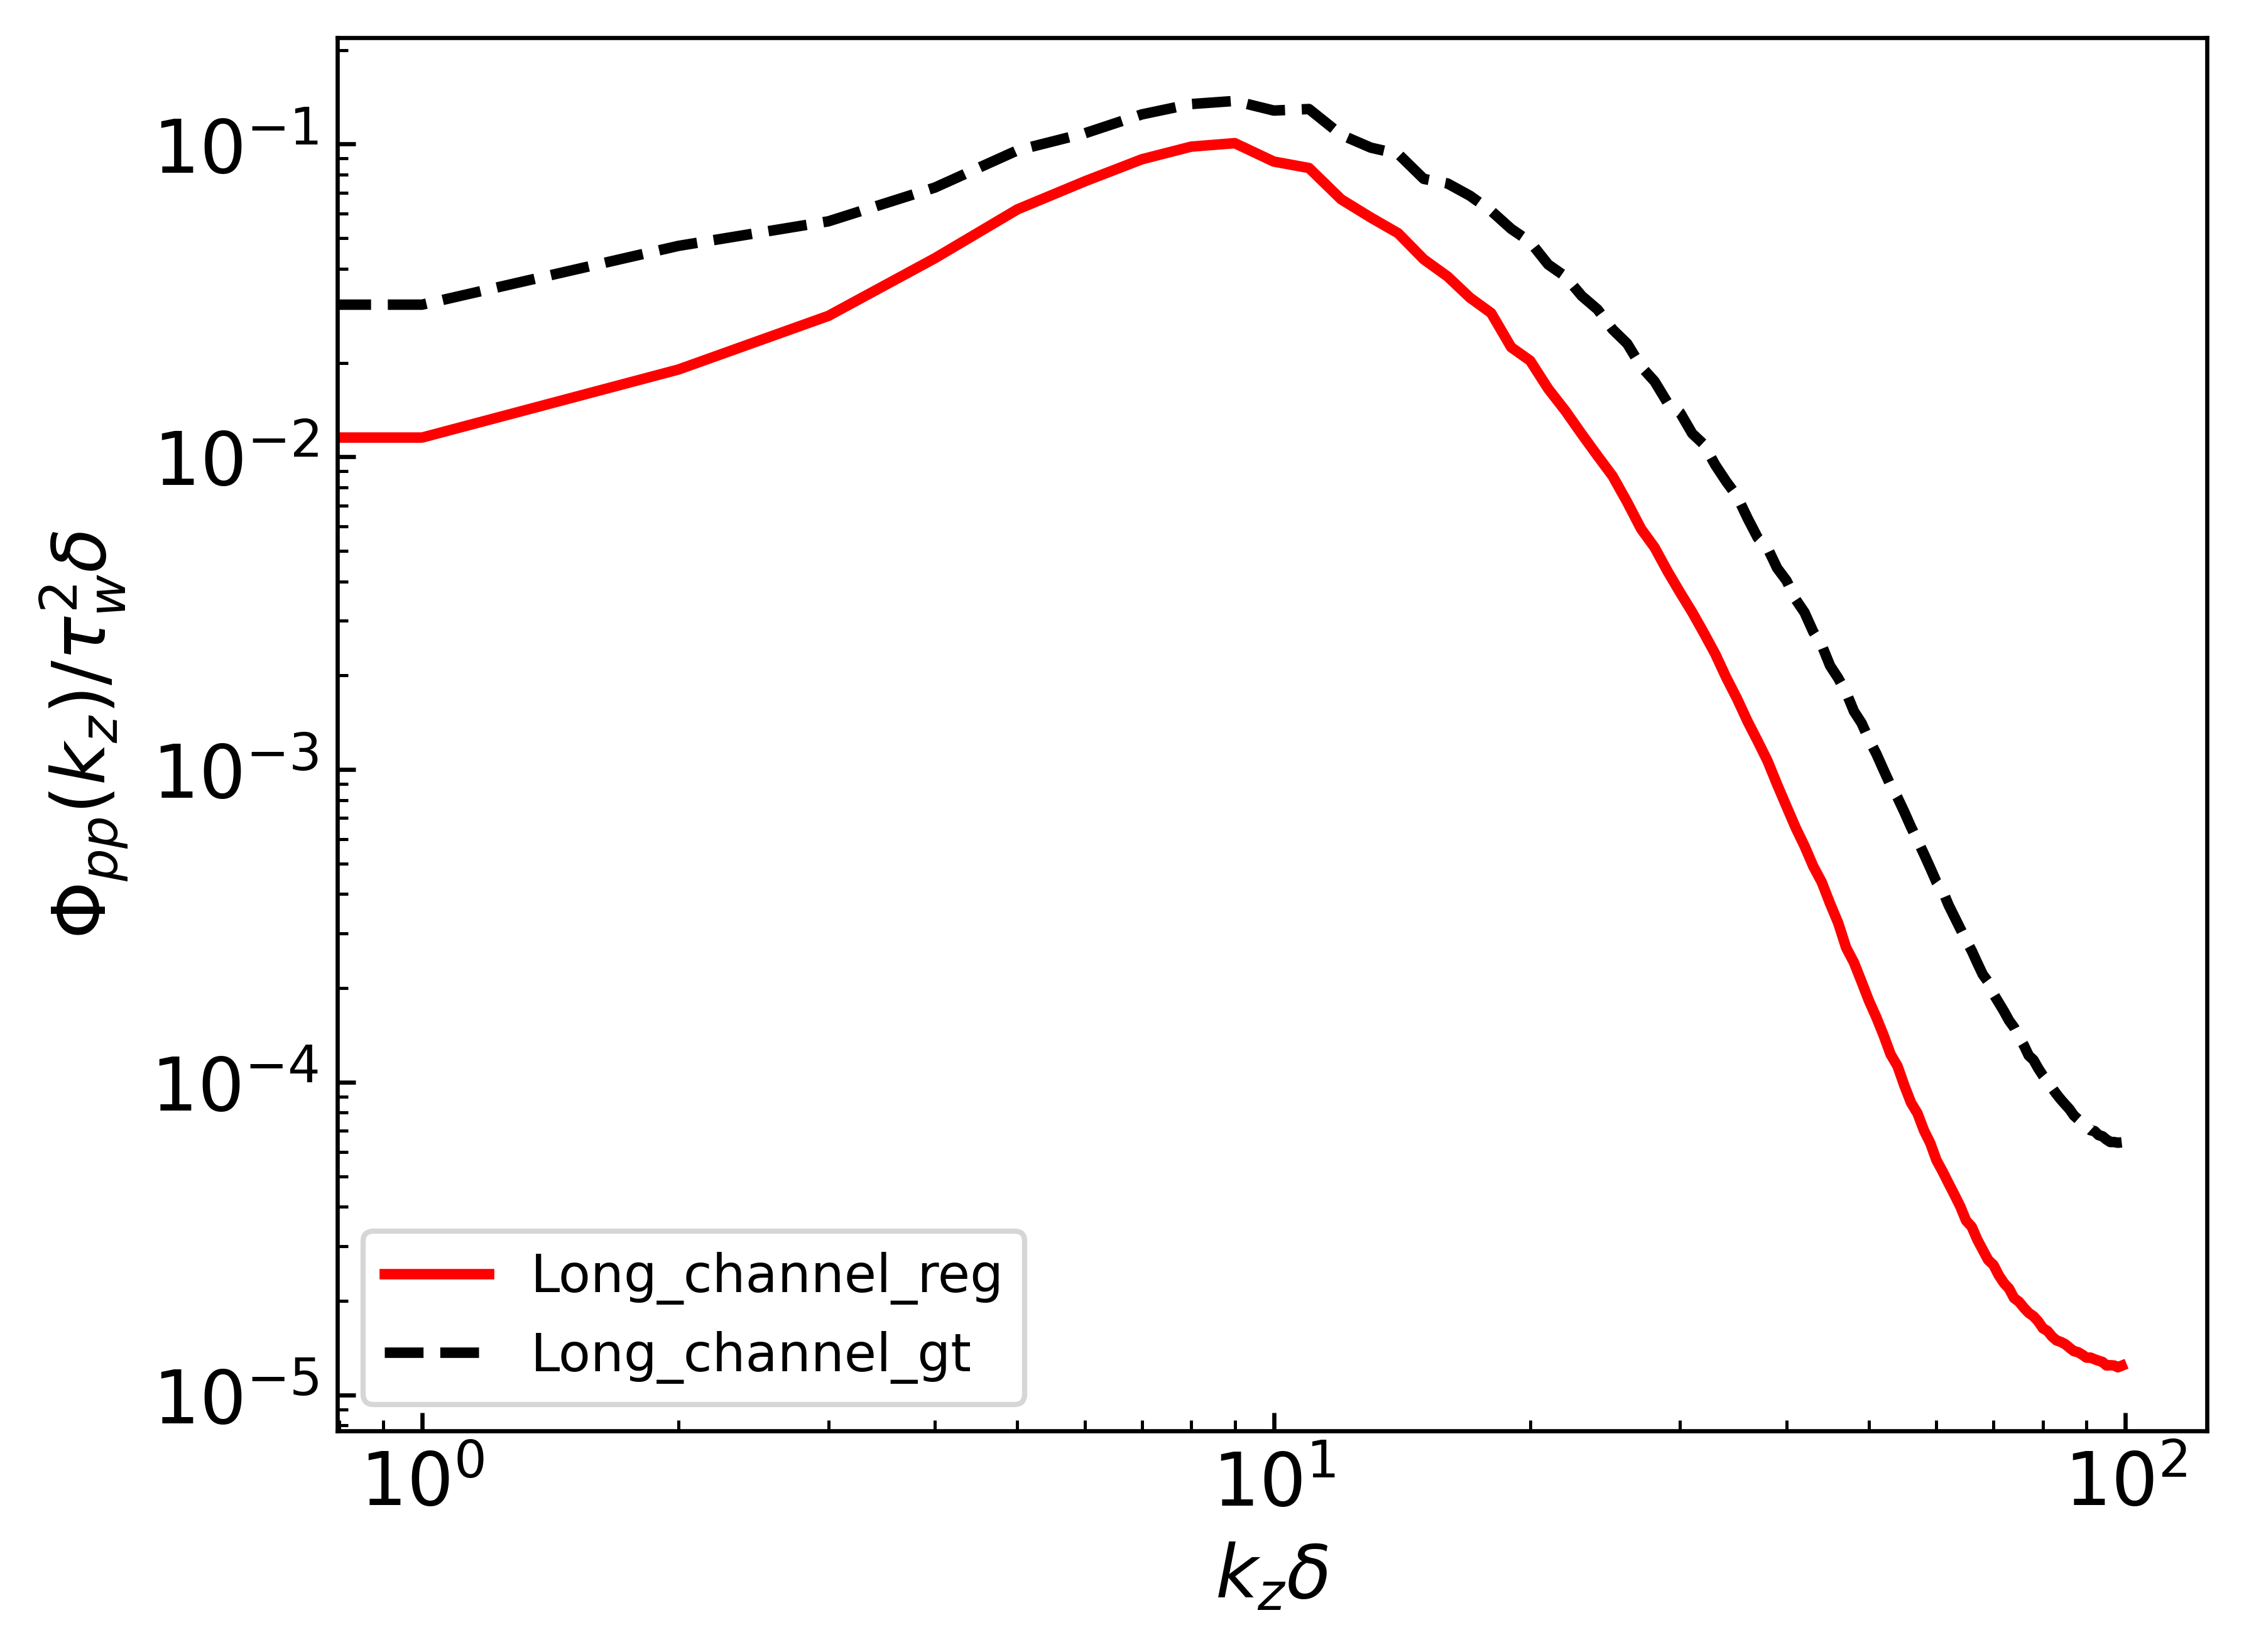

In [42]:
# normalize 
f_z_n = 2*jnp.pi*f_z
P_z_n = P_z#/(tau_w)**2

f_z_n_gt = 2*jnp.pi*f_z_gt
P_z_n_gt = P_z_gt#/(tau_w)**2

# load ref
ref_z = np.loadtxt('/home/xiantao/code/NNwall/Diff-FSI/example/wall_pressure/p_z_180.txt')
# f_z_ref, P_z_ref = ref_z[:,0], ref_z[:,1]
# incompre_z = np.load(data_fold+'/p_z.npy')

# hfont = {'fontname':'Times New Roman'}
# plt.rc('font',family='Times New Roman')
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.figure(dpi=600)
# plt.plot(incompre_z[0],  incompre_z[1],  color='blue',linewidth=2,label='Incompressible')
plt.plot(f_z_n,  P_z_n,color='red',linewidth=2,label='Long_channel_reg')
plt.plot(f_z_n_gt,  P_z_n_gt,'--', color='black',linewidth=2,label='Long_channel_gt')

# plt.scatter(f_z_ref,  P_z_ref,marker='x',color='green',s=30,label='Choi & Moin (1990)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_z \delta$',fontsize = 14)
plt.ylabel(r'$\Phi_{pp}(k_z)  /\tau^2_w \delta$',fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlim(1,100)
# plt.ylim(1e-6,1e0)
plt.legend()
plt.show()

In [43]:
sub_length=1
sub_sample=np.arange(0,data.shape[0],sub_length)

P_t_sum=[None]*len(sub_sample)
P_t_sum_gt=[None]*len(sub_sample)

i=0
for s in sub_sample:
    diff=get_pressure_spectrum(data[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    diff_gt=get_pressure_spectrum(gt[s:s+sub_length], nx, nz, nt, Lx, Lz, dx, dz, dt)
    f_t, P_t_sum[i]=diff.get_fft_t()
    f_t_gt, P_t_sum_gt[i]=diff_gt.get_fft_t()

    i=i+1

P_t=jnp.mean(jnp.array(P_t_sum), axis=0)
P_t_gt=jnp.mean(jnp.array(P_t_sum_gt), axis=0)

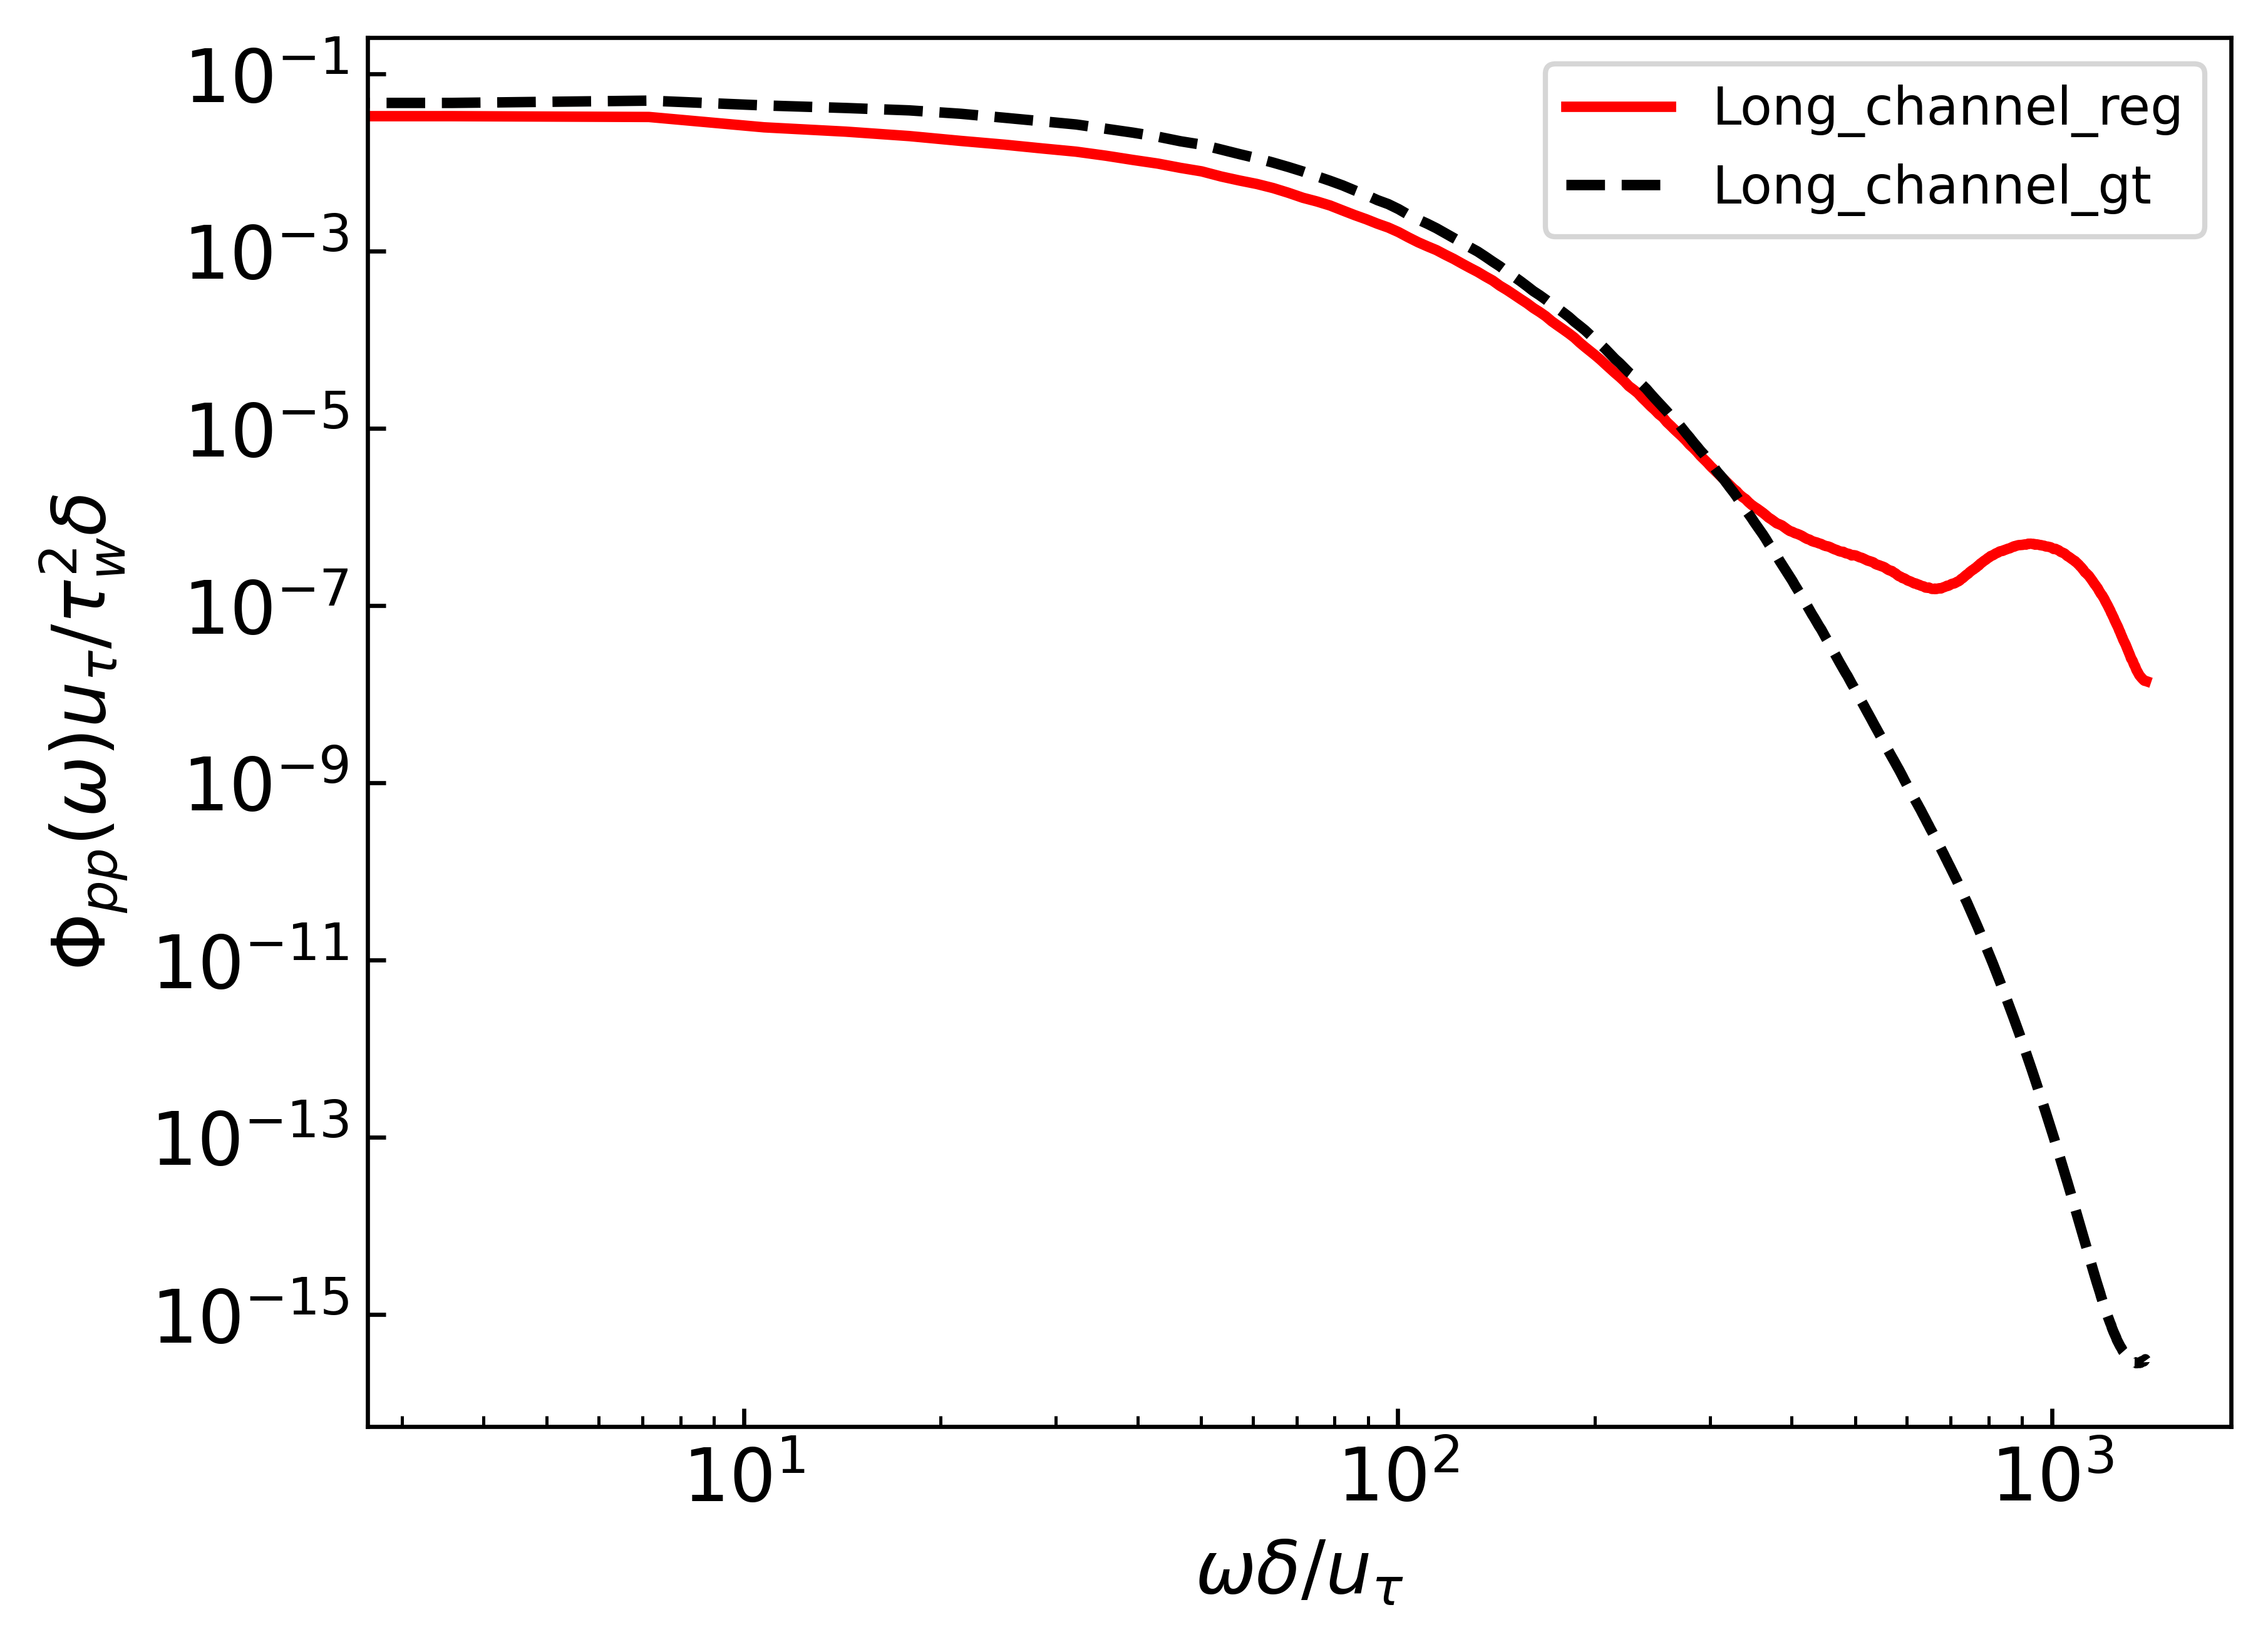

In [44]:
# normalize 
wall_unit = nu / u_tau
tau_w=u_tau**2

f_t_n = 2*jnp.pi*f_t/u_tau
P_t_n = P_t*u_tau#/(tau_w**2)

f_t_n_gt = 2*jnp.pi*f_t_gt/u_tau
P_t_n_gt = P_t_gt*u_tau#/(tau_w**2)

# load ref
ref_t = np.loadtxt('/home/xiantao/code/NNwall/Diff-FSI/example/wall_pressure/p_t_180.txt')
f_t_ref, P_t_ref = ref_t[:,0], ref_t[:,1]
# incompre_t = np.load(data_fold+'/p_t.npy')

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.figure(dpi=600)
# plt.plot(incompre_t[0],  incompre_t[1],  color='blue',linewidth=2,label='Incompressible')
plt.plot(f_t_n,  P_t_n,color='red',linewidth=2,label='Long_channel_reg')
plt.plot(f_t_n_gt,  P_t_n_gt, '--',color='black',linewidth=2,label='Long_channel_gt')

# plt.scatter(f_t_ref,  P_t_ref ,marker='x',color='green',s=30,label='Choi & Moin (1990)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\omega \delta / u_{\tau}$',fontsize = 14)
plt.ylabel(r'$\Phi_{pp}(\omega) u_{\tau}/\tau^2_w \delta$',fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlim(3,1e3)
# plt.ylim(1e-6,1e-1)
plt.legend()
plt.show()